# CentraleSupelec - Statistique et apprentissage - TP1

## 1. Moyenne et variance empirique

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Data
Les données consistent en un ensemble de dix salaires.

In [2]:
data = pd.DataFrame({'salaries': 
                     [33219, 36254, 38801, 46335, 46840, 
                      47596, 55130, 56863, 78070, 88830]})
data[0:]

,salaries
0,33219
1,36254
2,38801
3,46335
4,46840
5,47596
6,55130
7,56863
8,78070
9,88830


<AxesSubplot:>

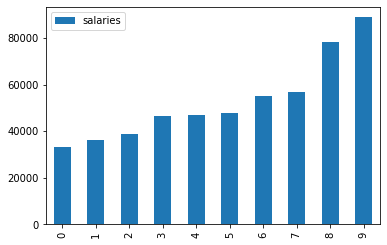

In [3]:
data.plot(kind='bar')

### Calcul de la variance empirique

The variance of a data set describes the average of the squared differences from the mean. In other words, it is a measure of how far each value in the data set is from the mean. The symbol for the variance of a population is $\sigma^2$ (sigma squared) and for a sample we use $s^2$. We calculate the variance by summing the squared difference from the mean for each value. For the population, we divide by the number of values $n$ in the data set.

La variance d'un ensemble de données décrit la moyenne des différences au carré par rapport à la moyenne. En d'autres termes, il s'agit d'une mesure de l'écart de chaque valeur de l'ensemble de données par rapport à la moyenne. Le symbole de la variance d'une population est $\sigma^2$ (sigma au carré) et pour un échantillon nous utilisons $s^2$. Nous calculons la variance en additionnant la différence au carré par rapport à la moyenne pour chaque valeur. 

Un estimateur de la variance peut-être obtenu en utilisant la formule suivante: 

$$population\ variance:\ \sigma^2=\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2$$

Lorsque la moyenne $\mu$ est inconnue, utiliser la moyenne empirique $\bar{x}$ (méthode de substitution) donne un estimateur biaisé. Pour corriger ce biais, on utilise généralement l'estimateur suivant:  

$$sample\ variance:\ s^2=\frac{1}{n-1}\sum_{i=0}^n(x_i-\bar{x})^2$$

On peut-remarquer que nous divisons maintenant les valeurs additionnées par un facteur $n-1$. Cette technique s'appelle la correction de Bessel (https://fr.qaz.wiki/wiki/Bessel%27s_correction).

**Question** Calculez la *population variance* et la  *sample variance* de l'échantillon*.

In [ ]:
################ To do ##############


Vous pouvez ensuite comparer votre résultat avec celui obtenu en utilisant les fonctions de numpy.

In [ ]:
population_variance = np.var(data.salaries) # ddof=0 by default in NumPy
sample_variance = np.var(data.salaries, ddof=1)

population_variance, sample_variance

## Calculer l'écart-type

L'écart-type est une mesure normalisée largement utilisée pour mesurer la dispersion d'un ensemble de données. Contrairement à la variance, l'écart-type utilise la même échelle que nos valeurs, en l'occurrence les euros. Dans une distribution normale, environ 95 % des valeurs se situent à moins de deux écarts types de la moyenne. Nous utilisons la lettre grecque sigma $\sigma$ pour symboliser l'écart-type de la population. 

$$population\ standard\ deviation:\ \sigma=\sqrt{\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2}\ \ =\ \ \sqrt{\sigma^2}$$

Nous utilisons la lettre minuscule $s$ pour l'écart type de l'échantillon.

$$sample\ standard\ deviation:\ s=\sqrt{\frac{1}{n-1}\sum_{i=0}^n(x_i-\bar{x})^2}\ \ =\ \ \sqrt{s^2}$$

**Question**: Calculez la *population standard deviation* et la *sample standard deviation*.

In [ ]:
################ To do ################

Vous pouvez ensuite comparer votre résultat avec celui obtenu en utilisant les fonctions de numpy.

In [ ]:
# Or call the NumPy std function ourselves
population_standard_deviation = np.std(data.salaries)
sample_standard_deviation = np.std(data.salaries, ddof=1)

population_standard_deviation, sample_standard_deviation

# Théorème central limite 

Dans cette partie, nous allons observer le théorème central limite. Pour cela, nous allons utiliser la librairie *python* de visualiation de données *seaborn* dont la documentation est accessible à cette adresse: https://seaborn.pydata.org/tutorial/distributions.html?highlight=density%20plot.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from __future__ import division

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

In [ ]:
sns.__version__

## Les données

Nous prenons comme population un dé tétraédrique (à quatre faces).

In [ ]:
# Un lancer mène à l'une des quatre issues suivantes
data = np.array([1.0, 2.0, 3.0, 4.0])
data

In [ ]:
# Nos données suivent une distribution uniforme parfaite.
p=sns.histplot(data, bins=4)

## Illustration du théorème central limite

Le théorème de la limite centrale stipule que si nous prenons la moyenne d'un grand nombre d'échantillons indépendants, la distribution de l'échantillonnage se rapprochera d'une distribution normale, quelle que soit la forme de la distribution sous-jacente. Illustrons cela en échantillonnant la moyenne de deux lancers ($n=2$) avec le dé tétraédrique.

In [ ]:
# Déterminons le nombre de résultats possibles 
# avec un échantillon de taille 2.
possible_outcomes = 4**2
possible_outcomes

In [ ]:
# Créez un dataframe panda avec la moyenne de tous les résultats possibles.
mean_outcome_matrix = pd.DataFrame(index=data, dtype='float64', columns=data )

for x in data:
    for y in data:
        mean_outcome_matrix[x][y] = np.mean([x,y])

# Below you see a heatmap of the mean of all possible outcomes
p=sns.heatmap(mean_outcome_matrix, annot=True)

In [ ]:
# Ci-dessous un graphique de la distribution d'échantillonnage de tous les résultats moyens possibles
# Notez que l'on obtient une distribution normale

diff_val_count = mean_outcome_matrix.stack().value_counts().count()
p=sns.displot(mean_outcome_matrix.stack(), bins=diff_val_count, kde=True)

## Jouons avec des données aléatoires

Pour illustrer le théorème centrale limite, nous allons visualiser les distribution obtenues en calculant la moyenne empirique d'un échantillon, pour des tailles d'échantillons de plus en plus grandes. 

Pour commencer, simulons une population de 1000000 lancers avec un dé tétraédrique pondéré (40% de d'obtenir un 4, 30% un 3, 20% un 2 et 10% un 1).

In [ ]:
non_normal_data = np.random.choice(data, 100000, p=[0.10, .20, .30, .4])
p=sns.histplot(non_normal_data)

In [ ]:
# Vérifions la moyenne de la distribution
non_normal_data.mean()

**Question**: Pour les tailles d'échantillon $n$ suivantes ([2,5,10,30]), répéter les opérations suivantes:

- effectuer 1000 tirages alléatoires des $n$ lancer de dés
- pour chaque tirage, calculer la moyenne empirique de l'échantillon
- affichez l'histogramme des moyennes empiriques obtenues, ainsi que la densité estimée correspondante (https://en.wikipedia.org/wiki/Kernel_density_estimation) 
    
Si tout se passe bien, vous devriez observer que lorsque nous prenons un échantillon plus important pour calculer la moyenne d'échantillonnage, la distribution résultante deviendra plus normale et plus maigre. En outre, la moyenne de la distribution d'échantillonnage correspondra davantage à la moyenne de la population.

Note: Pour afficher des sous graphes, vous pouvez utiliser vous inspirer du code suivant:

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 2)
axes = [ax1[0], ax1[1], ax2[0], ax2[1]]
ax = 0

for i in [1,2,3,4]:
    x= np.linspace(0,10)
    axes[ax].plot(x, np.vectorize(math.sin)(x))
    axes[ax].set_title("axe " + str(ax))
    ax += 1  
    
plt.tight_layout()

In [ ]:
######### To do ###########
# Dans cet exemple, nous traçons quatre distributions d'échantillonnage
# de différentes tailles pour montrer l'effet de l'augmentation de 
# la taille de l'échantillon.
# Notez que la distribution devient plus normale et plus maigre
# avec l'augmentation de la taille de l'échantillon.

# Intervalle de confiance

Si nous voulons estimer un paramètre de population (moyenne, proportion, écart-type) à partir d'une statistique d'échantillon, nous ne pouvons jamais être sûrs de notre résultat. Mais nous pouvons donner un certain niveau de confiance de notre prédiction, l'intervalle de confiance (IC). Nous utilisons les symboles suivants pour représenter les paramètres et les statistiques.

|   |mean|proportion|std dev|   |
|---|:---:|:---:|:---:|---|
|population|$\mu$|$p$|$\sigma$|parameters|
|sample|$\bar{x}$|$\hat{p}$|$s$|statistics|

Calculons à 95% l'intervalle de confiance de la moyenne de l'échantillon des scores Klout. Pour les grands échantillons, nous pouvons résoudre l'inégalité suivante avec un niveau alpha de $\alpha=.05$.

$$\bar{x}-q_{\alpha/2}\cdot\frac{s}{\sqrt{n}}\lt\mu_{estimator}\lt\bar{x}+q_{\alpha/2}\cdot\frac{s}{\sqrt{n}}$$ 

avec $q_{\alpha/2}$ le quantile d'ordre $\alpha/2$ de la loi normale.

## Les données (Klout score)

Nous utilisons un échantillon aléatoire de scores d'influence des médias sociaux du service Klout.com (https://fr.wikipedia.org/wiki/Klout) ("Klout scores"). Sur une population de 620+ millions de scores, nous avons obtenu une taille d'échantillon $n=1048$.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from __future__ import division

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.22.3'

In [2]:
# Load the data from a csv file
data = pd.read_csv('data/klout-scores.csv', header=None, names=['scores'])
data.head()

      scores
0  25.104179
1  60.908747
2  23.222238
3  51.553491
4  22.629690

**Question** affichez l'histograme des Klout scores.

In [3]:
# Sample size
n = data.scores.count()

# The confidence coefficient
confidence_coef = .95

# The alpha level
alpha = 1. - confidence_coef

In [5]:
################ To do ################
klout_xbar = data.scores.mean()
print(f'klout_xbar {klout_xbar}')
klout_std = data.scores.std()
print(f'klout_std {klout_std}')

klout_xbar 37.71905483253817
klout_std 16.044314979048984


**Question**: Calculez l'interval de confiance à 95% du score clout de l'échantillon.

In [ ]:
# Sample size
n = data.scores.count()

# The confidence coefficient
confidence_coef = .95

# The alpha level
alpha = 1. - confidence_coef

In [9]:
################ To do ################
q_alpha_2 = stats.norm.ppf(alpha / 2) * -1
q_alpha_2

1.959963984540054

In [10]:
klout_CI_mean_lower = klout_xbar - q_alpha_2 * (klout_std / math.sqrt(n))
klout_CI_mean_upper = klout_xbar + q_alpha_2 * (klout_std / math.sqrt(n))
print(klout_CI_mean_lower, klout_CI_mean_upper)

36.747676014280636 38.690433650795704
